In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   
# TODO change the path as relative path
args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 256                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 150

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.seed                             = 1


args.data_name                        =  "hapt"

args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.wavelet_filtering_finetuning     = False
args.wavelet_filtering_finetuning_percent = 0.5
args.wavelet_filtering_learnable      = False
args.wavelet_filtering_layernorm      = False

args.regulatization_tradeoff          = 0
args.number_wavelet_filtering         = 6


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"
if args.data_name      ==  "skodar":
    args.exp_mode            = "SOCV"
config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 0.5
args.model_type              = "deepconvlstm"#"deepconvlstm"#"sahar" #"deepconvlstm"

# 实验

In [5]:
# 如果我们设置为 
args.wavelet_filtering_learnable      = False
exp = Exp(args)

Use GPU: cuda:0
clone the  wavefiler weight
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Done!
Parameter : 87307
Set the seed as :  1


In [6]:
# 如果我们设置为 
# args.wavelet_filtering_learnable      = True
# exp = Exp(args)

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 30 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.0006689  0.00068213 0.00073746 0.00061275 0.00056243 0.00056754
 0.00746269 0.01041667 0.00641026 0.00719424 0.00534759 0.00724638]
Train data number :  10339
The number of classes is :  12
The input_length  is :  128
The channel_in is :  6
Validation data number :  1149
Test data number :  6632
================ Build the model ================ 
clone the  wavefiler weight
Build the DeepConvLSTM model!
Epoch: 1 cost time: 7.876538276672363
VALI: Epoch: 1, Steps: 41 | Train Loss: 1.7573069  Vali Loss: 1.0373218 Vali Accuracy: 0.6396867  Vali weighte

Epoch: 27 cost time: 5.08514404296875
VALI: Epoch: 27, Steps: 41 | Train Loss: 0.0881603  Vali Loss: 0.0820515 Vali Accuracy: 0.9643168  Vali weighted F1: 0.9639143  Vali macro F1 0.8230377 
new best score!!!!
Validation loss decreased (0.084724 --> 0.082052).  Saving model ...
new best score!!!!
Epoch: 28 cost time: 5.09714674949646
VALI: Epoch: 28, Steps: 41 | Train Loss: 0.0859164  Vali Loss: 0.0850337 Vali Accuracy: 0.9634465  Vali weighted F1: 0.9631189  Vali macro F1 0.8189963 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 29 cost time: 5.092160224914551
VALI: Epoch: 29, Steps: 41 | Train Loss: 0.0855279  Vali Loss: 0.0852866 Vali Accuracy: 0.9625762  Vali weighted F1: 0.9625233  Vali macro F1 0.8137208 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 30 cost time: 5.062138795852661
VALI: Epoch: 30, Steps: 41 | Train Loss: 0.0846900  Vali Loss: 0.0845906 Vali Accuracy: 0.9634465  Vali weighted F1: 0.963

Epoch: 8 cost time: 5.068140983581543
VALI: Epoch: 8, Steps: 41 | Train Loss: 0.2163367  Vali Loss: 0.2227514 Vali Accuracy: 0.9220779  Vali weighted F1: 0.9189597  Vali macro F1 0.7402411 
new best score!!!!
Validation loss decreased (0.223302 --> 0.222751).  Saving model ...
new best score!!!!
Epoch: 9 cost time: 5.070141315460205
VALI: Epoch: 9, Steps: 41 | Train Loss: 0.2006119  Vali Loss: 0.2500447 Vali Accuracy: 0.9134199  Vali weighted F1: 0.9110459  Vali macro F1 0.7655933 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 10 cost time: 5.068180561065674
VALI: Epoch: 10, Steps: 41 | Train Loss: 0.1981828  Vali Loss: 0.1840635 Vali Accuracy: 0.9307359  Vali weighted F1: 0.9275957  Vali macro F1 0.7531880 
new best score!!!!
Validation loss decreased (0.222751 --> 0.184063).  Saving model ...
new best score!!!!
Epoch: 11 cost time: 5.071141004562378
VALI: Epoch: 11, Steps: 41 | Train Loss: 0.1680900  Vali Loss: 0.1799054 Vali Accuracy: 0.937662

Epoch: 37 cost time: 5.08516526222229
VALI: Epoch: 37, Steps: 41 | Train Loss: 0.0609574  Vali Loss: 0.1394719 Vali Accuracy: 0.9549784  Vali weighted F1: 0.9551171  Vali macro F1 0.8381633 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 38 cost time: 5.074150323867798
VALI: Epoch: 38, Steps: 41 | Train Loss: 0.0624124  Vali Loss: 0.1367214 Vali Accuracy: 0.9549784  Vali weighted F1: 0.9547738  Vali macro F1 0.8416231 
new best score!!!!
Validation loss decreased (0.137654 --> 0.136721).  Saving model ...
new best score!!!!
Epoch: 39 cost time: 5.078095436096191
VALI: Epoch: 39, Steps: 41 | Train Loss: 0.0614859  Vali Loss: 0.1380548 Vali Accuracy: 0.9558442  Vali weighted F1: 0.9556463  Vali macro F1 0.8420888 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 40 cost time: 5.072389125823975
VALI: Epoch: 40, Steps: 41 | Train Loss: 0.0605193  Vali Loss: 0.1375256 Vali Accuracy: 0.9593074  Vali weighted F1: 0.95

Epoch: 4 cost time: 5.0891478061676025
VALI: Epoch: 4, Steps: 41 | Train Loss: 0.3358250  Vali Loss: 0.3010188 Vali Accuracy: 0.8950989  Vali weighted F1: 0.8848722  Vali macro F1 0.6482029 
new best score!!!!
Validation loss decreased (0.356053 --> 0.301019).  Saving model ...
new best score!!!!
Epoch: 5 cost time: 5.087145090103149
VALI: Epoch: 5, Steps: 41 | Train Loss: 0.2944133  Vali Loss: 0.2741820 Vali Accuracy: 0.9097163  Vali weighted F1: 0.9054818  Vali macro F1 0.7122850 
new best score!!!!
Validation loss decreased (0.301019 --> 0.274182).  Saving model ...
new best score!!!!
Epoch: 6 cost time: 5.087144374847412
VALI: Epoch: 6, Steps: 41 | Train Loss: 0.2615316  Vali Loss: 0.2548648 Vali Accuracy: 0.9148753  Vali weighted F1: 0.9124244  Vali macro F1 0.7378657 
new best score!!!!
Validation loss decreased (0.274182 --> 0.254865).  Saving model ...
new best score!!!!
Epoch: 7 cost time: 5.0901453495025635
VALI: Epoch: 7, Steps: 41 | Train Loss: 0.2414962  Vali Loss: 0.23701

Epoch: 33 cost time: 5.1091413497924805
VALI: Epoch: 33, Steps: 41 | Train Loss: 0.0743206  Vali Loss: 0.1299756 Vali Accuracy: 0.9535684  Vali weighted F1: 0.9533933  Vali macro F1 0.8374100 
EarlyStopping counter: 4 out of 15
Learning rate adjusting counter: 4 out of 5
Epoch: 34 cost time: 5.125144720077515
VALI: Epoch: 34, Steps: 41 | Train Loss: 0.0713156  Vali Loss: 0.1384776 Vali Accuracy: 0.9552880  Vali weighted F1: 0.9547180  Vali macro F1 0.8387459 
EarlyStopping counter: 5 out of 15
Learning rate adjusting counter: 5 out of 5
Updating learning rate to 0.0001
Epoch: 35 cost time: 5.134155511856079
VALI: Epoch: 35, Steps: 41 | Train Loss: 0.0605771  Vali Loss: 0.1231185 Vali Accuracy: 0.9595873  Vali weighted F1: 0.9591679  Vali macro F1 0.8422641 
new best score!!!!
Validation loss decreased (0.123199 --> 0.123118).  Saving model ...
new best score!!!!
Epoch: 36 cost time: 5.157168626785278
VALI: Epoch: 36, Steps: 41 | Train Loss: 0.0571014  Vali Loss: 0.1235208 Vali Accuracy

Epoch: 10 cost time: 5.095154762268066
VALI: Epoch: 10, Steps: 41 | Train Loss: 0.2008773  Vali Loss: 0.2396822 Vali Accuracy: 0.9058722  Vali weighted F1: 0.9044264  Vali macro F1 0.7138940 
new best score!!!!
Validation loss decreased (0.243310 --> 0.239682).  Saving model ...
new best score!!!!
Epoch: 11 cost time: 5.07614278793335
VALI: Epoch: 11, Steps: 41 | Train Loss: 0.1880324  Vali Loss: 0.2054651 Vali Accuracy: 0.9222798  Vali weighted F1: 0.9207583  Vali macro F1 0.7549469 
new best score!!!!
Validation loss decreased (0.239682 --> 0.205465).  Saving model ...
new best score!!!!
Epoch: 12 cost time: 5.163161516189575
VALI: Epoch: 12, Steps: 41 | Train Loss: 0.1795717  Vali Loss: 0.2077352 Vali Accuracy: 0.9205527  Vali weighted F1: 0.9204411  Vali macro F1 0.7220339 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 13 cost time: 5.107140064239502
VALI: Epoch: 13, Steps: 41 | Train Loss: 0.1629929  Vali Loss: 0.1949106 Vali Accuracy: 0.924

VALI: Epoch: 39, Steps: 41 | Train Loss: 0.0683719  Vali Loss: 0.1460797 Vali Accuracy: 0.9481865  Vali weighted F1: 0.9469116  Vali macro F1 0.8247207 
EarlyStopping counter: 4 out of 15
Learning rate adjusting counter: 4 out of 5
Epoch: 40 cost time: 5.15042519569397
VALI: Epoch: 40, Steps: 41 | Train Loss: 0.0670393  Vali Loss: 0.1368785 Vali Accuracy: 0.9473230  Vali weighted F1: 0.9468684  Vali macro F1 0.8150424 
new best score!!!!
Validation loss decreased (0.137136 --> 0.136879).  Saving model ...
new best score!!!!
Epoch: 41 cost time: 5.104149103164673
VALI: Epoch: 41, Steps: 41 | Train Loss: 0.0651750  Vali Loss: 0.1460247 Vali Accuracy: 0.9447323  Vali weighted F1: 0.9447135  Vali macro F1 0.8016123 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 42 cost time: 5.145148992538452
VALI: Epoch: 42, Steps: 41 | Train Loss: 0.0572987  Vali Loss: 0.1519823 Vali Accuracy: 0.9464594  Vali weighted F1: 0.9474322  Vali macro F1 0.8243220 
EarlySt

Epoch: 11 cost time: 5.058887720108032
VALI: Epoch: 11, Steps: 41 | Train Loss: 0.1802658  Vali Loss: 0.1721651 Vali Accuracy: 0.9417897  Vali weighted F1: 0.9404171  Vali macro F1 0.7939535 
new best score!!!!
Validation loss decreased (0.189602 --> 0.172165).  Saving model ...
new best score!!!!
Epoch: 12 cost time: 5.032131671905518
VALI: Epoch: 12, Steps: 41 | Train Loss: 0.1650734  Vali Loss: 0.1577572 Vali Accuracy: 0.9417897  Vali weighted F1: 0.9398469  Vali macro F1 0.7882138 
new best score!!!!
Validation loss decreased (0.172165 --> 0.157757).  Saving model ...
new best score!!!!
Epoch: 13 cost time: 5.029139280319214
VALI: Epoch: 13, Steps: 41 | Train Loss: 0.1643802  Vali Loss: 0.1665967 Vali Accuracy: 0.9409209  Vali weighted F1: 0.9398215  Vali macro F1 0.7912288 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 14 cost time: 5.149150371551514
VALI: Epoch: 14, Steps: 41 | Train Loss: 0.1542654  Vali Loss: 0.1667617 Vali Accuracy: 0.94

KeyboardInterrupt: 

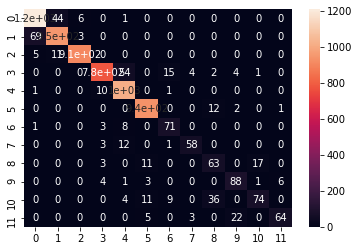

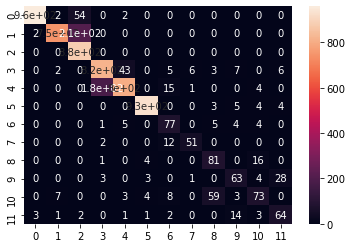

In [ ]:
exp.train()

In [6]:
dataset = data_dict[args.data_name](args)

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------


In [7]:
import numpy as np

In [8]:
start_index = dataset.train_slidingwindows[0][1]
end_index   = dataset.train_slidingwindows[0][2]
sample_x_1    = dataset.data_x.iloc[start_index:end_index, 1:-1].values

start_index = dataset.train_slidingwindows[100][1]
end_index   = dataset.train_slidingwindows[100][2]
sample_x_2    = dataset.data_x.iloc[start_index:end_index, 1:-1].values

temp_1 = np.expand_dims(sample_x_1,0)
temp_2 = np.expand_dims(sample_x_2,0)
combined_x = np.concatenate([temp_1,temp_2],axis=0)
combined_x = np.expand_dims(combined_x,1)
combined_x = torch.tensor(combined_x).double().to(exp.device)
print(combined_x.shape)

torch.Size([2, 1, 128, 6])


In [9]:
out = exp.model(combined_x)
out = out.cpu().detach().numpy()

In [10]:
out.shape

(2, 31, 128, 6)

In [20]:
weight = exp.model.wave_conv.wavelet_conv.weight.cpu().detach().numpy()

In [18]:
for n,p in exp.model.named_parameters():
    print(n)

gamma
wave_conv.wavelet_conv.weight


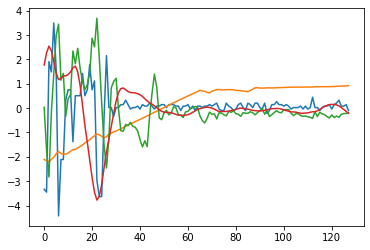

In [23]:
import matplotlib.pyplot as plt
index1 = 0
index2 = 0

plt.figure()
plt.plot(out[0,0,:,index2])
plt.plot(out[0,1,:,index2])
plt.plot(out[0,2,:,index2])
plt.plot(out[0,3,:,index2])

In [6]:
# 如果我们设置为 
# args.wavelet_filtering_learnable      = True
# exp = Exp(args)